#**HW 1 : From Perceptron to DNN**

In this first homework, we are going to write our own simple feedforward neural network using just Python and NumPy (the standard numeric library for Python). We will start by implementing just a simple neuron, or perceptron, then we define the training algorithm for this simple model.
The second part consists in defining a simple neural network to perform digits classification.


## Exercise 1.1: Perceptron

In this first exercise, we will implement a simple neuron, or perceptron, as visualized below. We will have just three inputs and one output neuron (we will skip the bias for now).
Notice how the perceptron just performs a sum of the individual inputs multiplied by the corresponding weights mapped through an activation function $f(\cdot)$.  This can also be expressed as a dot product of the weight vector $\textbf{W}$ and the input vector $\textbf{x}$. Thus: $\hat{y}=f(\textbf{W}^T \textbf{x})$.

In this first part we will implement the perpetron by using [numpy](https://docs.scipy.org/doc/numpy/reference/) library.

In [140]:
import numpy as np

### Training data

Let's consider a very simple dataset. The dataset is composed of the inputs value $x \in \mathbb{R}^3$ and the desired target values. Below, each row is a single example: the first three columns the input and the last column the target output.

    0 0 1  0  
    0 1 1  0  
    1 0 1  1  
    1 1 1  1  

Note that our target outputs are equal to the first column of the input. Therefore the task that the model should learn is very simple. We will see if it can learn that just from the data.

Now let's define the `X` and `y` matrices.

In [141]:
# Our input data is a matrix, each row is one input sample
X = np.array([[0,0,1],
              [0,1,1],
              [1,0,1],
              [1,1,1]])
    
# The target output as a column vector in 2-D array format (.T means transpose)
y = np.array([[0,0,1,1]]).T

print('X=',X)
print('y=',y)

X= [[0 0 1]
 [0 1 1]
 [1 0 1]
 [1 1 1]]
y= [[0]
 [0]
 [1]
 [1]]


### Activation function

As we said before, in order to define a perceptro we need to define the activation function $f(\cdot)$. There are many possibile activation function that can be use. Let's plot some commonly used activation functions.




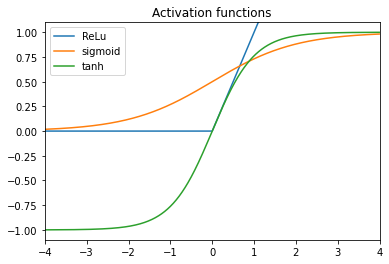

In [142]:
import matplotlib.pyplot as plt 
x = np.arange(-4,4,.01)
plt.figure()
plt.plot(x, np.maximum(x,0), label='ReLu')
plt.plot(x, 1/(1+np.exp(-x)), label='sigmoid')
plt.plot(x, np.tanh(x), label='tanh')
plt.axis([-4, 4, -1.1, 1.1])
plt.title('Activation functions')
l = plt.legend()

# Delete temporary variables, so not to cause any confusion later :-)
del x, l

In this particular case we will use the sigmoid function. So, let's define $f(\cdot)$ as the sigmoid function

$\sigma(x)=\frac{1}{1+\exp^{-x}}$

In [143]:
def f(x):
    return 1/(1+np.exp(-x))

### Weight initialization

We have to initialise our weights. Let's initialize them randomly, so that their mean is zero. The weights matrix map the input space into the output space, therefore in our case $\mathbf{W} \in \mathbb{R}^{3 \times 1}$

In [144]:
np.random.seed([42])

# initialize weights randomly with mean 0
W = 2*np.random.random((3,1)) - 1

print('W=', W)

W= [[ 0.2788536 ]
 [-0.94997849]
 [-0.44994136]]


### Forward propagation

Now let's try one round of forward propagation.  This means taking an input sample and moving it forward through the network, finally calculating the output of the network.

For our single neuron this is simply $\hat{\mathbf{y}} = f(\mathbf{W}^T \mathbf{x})$, where $\mathbf{x}$ is one input vector.

each input sample is arranged as a row of the matrix `X`, therefore we can access the first row by `X[0]`. Let's store it in the variable `X0` for easier access. We'll use `reshape` to make sure it's expressed as a column vector.

In [145]:
X0=np.reshape(X[0], (3,1))
print(X0)

[[0]
 [0]
 [1]]


The output $\hat{y}$ for the first input can be calculated according to the formula given above

In [146]:
y_out = f(np.dot(W.T, X0))

print('y_out=', y_out)

y_out= [[0.38937471]]


the target result is stored in `y[0]`.  If you check back, you can see we defined it to be 0. You can see that our network is pretty far away from the right answer. This is why we need to backpropagate the error, to adjust the weights in the right direction.

### Backpropagation

The next step is to update the weights by propagating the error backward in the network.  Exactly how this is done depends on the activation function, or more specifically its derivative. The activation function of the considered model is the sigmoid, its derivative is:

$\sigma(x) \cdot (1-\sigma(x))$

Recall that the weight update is given as $\Delta w_{ji} = -\epsilon \delta_j x_i$. Our network has only one layer, so $x_i$ is just the input, i.e., and a single output neuron so there is no need for index $j$. 

In matrix form we can calculate this for all the weights:

$$\Delta \textbf{W} = -\epsilon \delta \textbf{x}_0$$
where $\delta$ is the gradient (grad in the code) and $\textbf{x}_0$ is our first input sample in variable `X0`.

Recall that $y$ is the desired output, i.e. `y[0]` in the Python code, and $\hat{y}$ is `y_out` here.

In [147]:
# the learning rate determines the step size in the gradient descent, you can experiment with different values if you want
learning_rate = 0.5 

# compute the gradient term
grad = (y_out - y[0])*y_out*(1 - y_out)

# Calculate the weight update
W_delta = -learning_rate * grad * X0

print(W_delta)

# Update the weights
W += W_delta

[[-0.        ]
 [-0.        ]
 [-0.04628926]]


Let's try a forward propagation again with the same input.

In [148]:
y_out=f(np.dot(W.T, X0))

print('y_out=', y_out)

y_out= [[0.37842689]]


You should notice that the result has moved (very slightly) towards the correct answer (that is zero). In order to converge to the right value we have to perform more iterations!

### Training iterations [TO COMPLETE]

Let's define a complete training procedure for our model. In each iteration we have to perform the forward propagation, then we'll check how much the output differs from the target and propagate the error back (backward propagation).  We'll do this for each sample data point and then iterate this over and over again using a for loop.

In [149]:
# For the training we need to iterate over the data set several times
num_iters = 1000

learning_rate = 0.5

# We'll also calculate the mean square error (MSE) in every round so we can see how it develops,
# mse is just an array to store these for each round
mse = np.zeros(num_iters)

# For-loop for the iterations
for it in range(num_iters):
    
    # For-loop going over each sample in X
    for n in range(len(X)):
        # Extract the n_th sample and the corresponding desired output
        x_n = np.reshape(X[n], (3,1))
        # Get the correponding target value
        y_target = y[n]
        
        # Forward propagation
        y_out = f(np.dot(W.T, x_n))

        # Let's keep track of the sum of squared errors
        mse[it] += (y_target-y_out)**2  #computed squared error between y_target and y_out
    
        # compute the gradient
        grad = (y_out - y_target)*y_out*(1 - y_out) 
    
        # Calculate the weights update
        W_delta = -learning_rate * grad * x_n

        # Update the weights
        W += W_delta

    # Divide by the number of elements to get the mean of the squared errors
    mse[it] /= len(X)


y_out = f(np.dot(X, W))
print("Output after training, y_out")
print(y_out)
print("Target output, y")
print(y)

Output after training, y_out
[[0.04636779]
 [0.03694572]
 [0.97020561]
 [0.96253637]]
Target output, y
[[0]
 [0]
 [1]
 [1]]


After the training phase, the output of the network is pretty close to the target output. 

How many iterations were required in order to obtain this result? We have set the number of the iteration to 1000, but it is interesting to study the trend of the error trought the iterations. In the next homework, we will analyze how to select the right number of epochs.

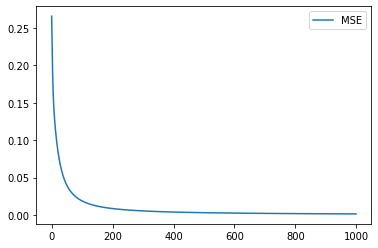

In [150]:
plt.figure()
plt.plot(range(num_iters), mse, label="MSE")
l = plt.legend()

You should see the error going down pretty quickly in the beginning and then slowing down.

### Batch training

With real-world data it is very slow to handle each example one-by-one like we did above.  Instead one typically uses so called mini batches of several input examples at once.

Lets consider a subset of samples from the training set. Each of these samples is one row in $\textbf{X}$, instead of a single column vector as before. The forward propagation step looks a bit different mathematically: $\hat{\textbf{y}} = f(\textbf{X}\textbf{W})$.

In [151]:
y_out = f(np.dot(X, W))
print(y_out)

[[0.04636779]
 [0.03694572]
 [0.97020561]
 [0.96253637]]


Then we will get the corresponding output (each value in `y_out`) for each input (each row in `X`) in single matrix multiplication.  The error and weight updates can similarly all be calculated in a single go using matrix multiplications similarly to the steps we did above with single vectors.

In these exercises, we'll stick to just doing one sample at a time, as the batch mode makes it a bit more complicated to understand.

## Exercise 1.2. The XOR problem

Now let's try a slightly more difficult example. We'll use the same input data, but a different desired output. 

    0 0 1  0  
    0 1 1  1  
    1 0 1  1  
    1 1 1  0 

In particular, the new input-output configuration represents the XOR problem (the last column of the input data is just ones, and thus irrelevant). This problem is interesting because it can not be solved by using a single layer perceptron. Indeed, you will need (at least) a two-layer network to solve it.
In this exercise we will first show that the network that we defined in the previous exercise, can not solve the XOR problem,  then, we will define a 2 layer perceptron able to compute the correct solution.

In [152]:
import numpy as np
import matplotlib.pyplot as plt 

np.random.seed([42])

X = np.array([[0,0,1],
              [0,1,1],
              [1,0,1],
              [1,1,1]])
    
y = np.array([[0,1,1,0]]).T

As we did in the previous exercise let's initialize the weights and define the activation function, also in this exercise we will use the sigmoid function.

In [153]:
# Weights initialization
W = 2*np.random.random((3,1)) - 1

# Activation function
def f(x):
    return 1/(1+np.exp(-x))

Now, let's run the network previously defined to check if it is able to solve the XOR problem.

In [154]:
num_iters = 1000
learning_rate = 0.5

for it in range(num_iters):
    for n in range(len(X)):
        x_n = np.reshape(X[n], (3,1))
        y_target = y[n]
        
        # Forward propagation
        y_out = f(np.dot(W.T, x_n))

        # Compute the Gradient
        grad = (y_out - y_target)*y_out*(1 - y_out)
    
        # Calculate the weights update
        W_delta = -learning_rate * grad * x_n

        # Update the weights
        W += W_delta


# Now let's see the output for each input sample with the trained weights
# Using batch mode we can do this in a single line
y_out = f(np.dot(X, W))
print("Output after training, y_out")
print(y_out)
print("Desired output, y")
print(y)



Output after training, y_out
[[0.516106  ]
 [0.5       ]
 [0.483894  ]
 [0.46782138]]
Desired output, y
[[0]
 [1]
 [1]
 [0]]


### Two layers network [TO COMPLETE]
As you can see the network is not able to solve the problem, it's not even close. You can try to increase the number of iterations, but it won't help.
Let's add a single hidden layer, for example with 4 hidden nodes (you can experiment with this number).
The input to the network is $\mathbf{x}$ as before.  The first hidden layer calculates $\textbf{h} = f(\textbf{W}_1^Tx)$, note that $\textbf{W}_1$ is now $\in \mathbb{R}^{3 \times 4}$.  The output layer calculates $\hat{y} = f(\textbf{W}_2^T\textbf{h})$ (note that $\hat{y}$ is named y_out in th code), where ${W}_2 \in \mathbb{R}^{4 \times 1}$.

We'll start by initializing the weights randomly.

In [155]:
num_hidden = 4

# initialize weights randomly with mean 0
W_1 = 2*np.random.random((3,num_hidden)) - 1
W_2 = 2*np.random.random((num_hidden,1)) - 1

We have to define the training procedure in order to manage the two layers

In [160]:
num_iters = 2000
eps = 0.5

mse = np.zeros(num_iters)

for it in range(num_iters):
    for n in range(len(X)):
        x_n = np.reshape(X[n], (3,1))
        y_target = y[n]        
        
        # Forward propagation
        h = f(np.dot(W_1.T,x_n))   # [TO COMPLETE] Calculate h
        y_out = f(np.dot(W_2.T,h)) # [TO COMPLETE] Calculate y_out
        
        # Let's keep track of the sum of squared errors
        mse[it] += (y_target-y_out)**2  #[TO COMPLETE]: compute squared error between y_target and y_out

        # [TO COMPLETE] Compute the gradient

        g2= (y_out-y_target)*y_out*(1-y_out)
        W2_d= -eps*g2*h
        g1= (g2*W_2*h*(1-h))*h
        W1_d= -eps*g1.T*x_n


        # hint: you can do this by performing a for loop over i (hidden nodes) and k (input nodes) and calculate 
        # each W_1_ik update separately
       
        # [TO COMPLETE] Update the weights
        # Note: it's important the W weights are updated at the end,
        # the above calculation should be done with the old weights
        
        W_2 += W2_d
        W_1 += W1_d

    # Divide by the number of elements to get the mean of the squared errors
    mse[it] /= len(X)

y_out = f(np.dot(f(np.dot(X, W_1)), W_2))
print("Output after training, y_out")
print(y_out)
print("Target output, y")
print(y)

Output after training, y_out
[[0.03005097]
 [0.96306992]
 [0.97274835]
 [0.03538069]]
Target output, y
[[0]
 [1]
 [1]
 [0]]


Now you should see outputs very similar to the desired ones 

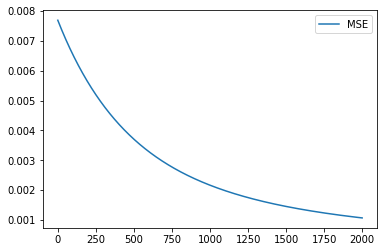

In [161]:
plt.figure()
plt.plot(range(num_iters), mse, label="MSE")
l = plt.legend()

## Exercise 1.3: handwritten digits classification
In this exercise, we try to apply what we learned in the previous exercise in a real-world scenario. In particular, we consider a simple digits classification problem. The model turns out to be similar to the perceptron implemented in Exercise 1.1, but here we will use softmax activation function and cross-entropy loss function. The idea is to create a model that has in input an image of a handwritten digit and that return a vector of 10 probabilities (one for each possible digit 0 - 9). 

### Dataset:
The dataset that we will use in this exercise is contained in [scikit-learn](https://scikit-learn.org/stable/). The dataset contains several samples. Each sample is composed of the image of the handwritten digit, a numeric representation of the image  (that will be the input of our model) and the target (the digit itself). 

Let's start by plotting one of this handwritten digit:

Text(0.5, 1.0, 'image label: 3')

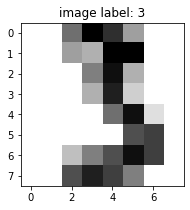

In [162]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits

np.random.seed([42])

digits = load_digits()

sample_index = 45
plt.figure(figsize=(3, 3))
plt.imshow(digits.images[sample_index], cmap=plt.cm.gray_r,
           interpolation='nearest')
plt.title("image label: %d" % digits.target[sample_index])

Check how an input $\mathbf{X}$ and its related target $\mathbf{y}$ are represented in the dataset

In [163]:
data = np.asarray(digits.data, dtype='float32')
target = np.asarray(digits.target, dtype='int32')

print("X:",data)

print("y:",target)

X: [[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
y: [0 1 2 ... 8 9 8]


#### One-hot encoding
In order to have a representation of the target that will be similar to the output of the model, we will use one-hot encoding. Basically, the one-hot encoding allows to encode a categorical integer feature using a one-of-K scheme

In [164]:
def one_hot(n_classes, y):
    return np.eye(n_classes)[y]

In [165]:
one_hot(n_classes=10, y=3)

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

### Activation Function: Softmax [TO COMPLETE]
As activation function we will use the Softmax function: This particular function is very useful when we have to deal with classification tasks and one-hot target because it turns numbers aka logits (pre-activations) into probabilities that sum to one. Basically, Softmax function outputs a vector that represents the probability distributions of a list of potential outcomes.
$$
softmax(\mathbf{x}) = \frac{e^{h_i}}{\sum_{i=1}^{n}{e^{x_i}}}
$$
In our case we have in input a matrix $\mathbf{X}$ where each row is a vector $\mathbf{x}$, therefore the softmax function that we have to implements will be mathematically defined as:
$$
softmax(\mathbf{x}) = \frac{1}{\sum_{i=1}^{n}{e^{x_i}}}
\cdot
\begin{bmatrix}
  e^{x_1}\\\\
  e^{x_2}\\\\
  \vdots\\\\
  e^{x_n}
\end{bmatrix}
$$


In [166]:
def softmax(X):
    #[TO COMPLETE] define softmax function
    e_x=np.exp(X)
    return e_x / e_x.sum()


### Loss Function: Cross Entropy ###
Usualy, a neural network-based classifier that use the softmax function in the final layer is commonly trained using Cross-Entropy as loss function.

In [167]:
EPSILON = 1e-8

def cross_entropy(Y_true, Y_pred):

    Y_true, Y_pred = np.atleast_2d(Y_true), np.atleast_2d(Y_pred)
    loglikelihoods = np.sum(np.log(EPSILON + Y_pred) * Y_true, axis=1)
    return -np.mean(loglikelihoods)


### Weights Initailiazation

Similarly to what we did in previous exercises, we have to initialize the weights, but in this case, we will consider also the bias term. Therefore we have the weights $\mathbf{W}\in\mathbb{R}^{m \times n}$ and the bias $\mathbf{b}\in\mathbb{R}^m$, where $n$ is the input size, and $m$ the number of classes.
Now we can define the output of our model

$\hat{\mathbf{y}}=softmax(\textbf{W} \textbf{x}+\mathbf{b})$



In [168]:
input_size=data.shape[1]
n_classes = len(np.unique(target))


W = np.random.uniform(size=(input_size,n_classes),high=0.1, low=-0.1)

b = np.random.uniform(size=n_classes, high=0.1, low=-0.1)

Let's consider a sample from the training set, and plot the current output of our model, before training it.

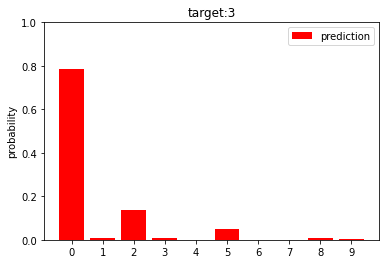

In [169]:
y_out=softmax(np.dot(data[sample_index], W) + b)

plt.bar(range(n_classes),y_out,label='prediction', color="red")
plt.ylim(0,1,0.1)
plt.xticks(range(n_classes))
plt.legend()
plt.ylabel("probability")
plt.title("target:"+str(target[sample_index]))
plt.show()

### Training procedure [TO COMPLETE]:
As in the previous exercise let's define a training procedure. Note that in this case, we have to compute the gradient according to the softmax function and the loss function that the training has to optimize. 

In this case, the gradient for the weights W is:

$\nabla_W=(\mathbf{\hat{y}}-\mathbf{y}) \cdot \mathbf{x}$

while for the bias is:

$\nabla_b=(\mathbf{\hat{y}}-\mathbf{y})$

During the training procedure let's compute the accuracy of the predictions and the loss value at each iteration:



In [170]:
num_iters = 50   
learning_rate = 0.0005

for it in range(num_iters):
    iteration_accuracy=[]
    iteration_loss=[]
    for i, (X, y) in enumerate(zip(data, target)):


        # Forward propagation
        y_out= softmax(np.dot(data[i], W) + b)


        y_truelable=one_hot(n_classes, y)


        # [TO COMPLETE] compute forward propagation using the softmax 
        # function previously defined as activation function

        #Eval the output error
      
        pred_err = y_out - one_hot(n_classes, y)




        # [TO COMPLETE] Compute the gradient (for the weights and the bias)

        gW= np.outer (X, (y_out-y_truelable)) 
        gb= (y_out-y_truelable)  

        W_d = -learning_rate * gW 
        b_d= -learning_rate * gb



        # [TO COMPLETE] Update the weights and the bias

        W += W_d  #weights
        b+= b_d   #bias

        # Note: it's important the weights W and the bias b are updated at the end
        # the above calculation should be done with the old weights

        iteration_accuracy.append(np.argmax(y_out) == y)
        iteration_loss.append(cross_entropy(one_hot(n_classes,y),y_out))

    print("iteration: ",it," -- accuracy: ",np.mean(np.asarray(iteration_accuracy)), " -- loss: ", np.mean(iteration_loss))


iteration:  0  -- accuracy:  0.8291597106288259  -- loss:  0.5599306985767775
iteration:  1  -- accuracy:  0.9504730105731776  -- loss:  0.1789185548330604
iteration:  2  -- accuracy:  0.9660545353366722  -- loss:  0.13731040143026943
iteration:  3  -- accuracy:  0.9699499165275459  -- loss:  0.11657311809302358
iteration:  4  -- accuracy:  0.9727323316638843  -- loss:  0.10309576643150416
iteration:  5  -- accuracy:  0.9755147468002225  -- loss:  0.09324272062785703
iteration:  6  -- accuracy:  0.9766277128547579  -- loss:  0.08555923701633708
iteration:  7  -- accuracy:  0.9782971619365609  -- loss:  0.0793208069402833
iteration:  8  -- accuracy:  0.9788536449638287  -- loss:  0.07411845534658529
iteration:  9  -- accuracy:  0.9816360601001669  -- loss:  0.06969679545124284
iteration:  10  -- accuracy:  0.9833055091819699  -- loss:  0.06588294465378018
iteration:  11  -- accuracy:  0.9844184752365053  -- loss:  0.06255354264270524
iteration:  12  -- accuracy:  0.9860879243183083  -- 

As you can see during the training the accuracy increase after each iteration, while the loss function value progressively decreases.

Let's now check how the prediction capability of our model change after the training:

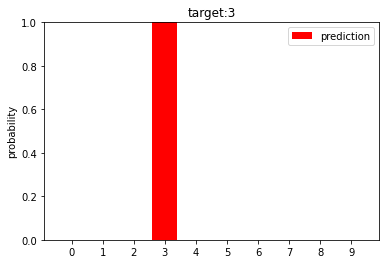

In [171]:
y_pred=softmax(np.dot(data[sample_index], W) + b)
plt.bar(range(n_classes), y_pred, label='prediction', color="red")
plt.ylim(0, 1, 0.1)
plt.xticks(range(n_classes))
plt.legend()
plt.ylabel("probability")
plt.title("target:"+str(target[sample_index]))
plt.show()